# Timeseries Analysis

1) Plotting a time series <br>
2) Plotting 2 time series <br>
3) Correlation between 2 time series <br>
4) Mean Reversion <br>
5) Autocorrelation - Mean Reversion or Trending relation <br>

##  Correlation and Autocorrelation

In [94]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Plotting a time series

                 Close
Date                  
2010-01-04  113.330002
2010-01-05  113.629997
2010-01-06  113.709999
2010-01-07  114.190002
2010-01-08  114.570000


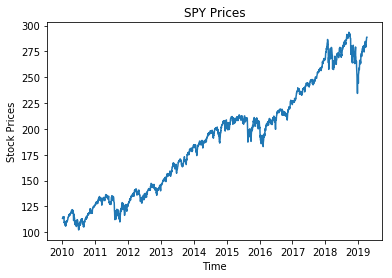

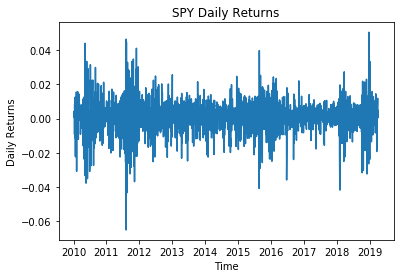

In [95]:
def data_clean(name):
    file_name="data/"+name+".csv"
    data=pd.read_csv(file_name)[['Date','Close']]
    data.index=pd.to_datetime(data['Date'])
    del data['Date']
    return data

spy=data_clean("SPY")
print(spy.head(5))

plt.plot(spy['Close'])
plt.title('SPY Prices')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.show()

spy_returns=spy.pct_change()
plt.plot(spy_returns)
plt.title('SPY Daily Returns')
plt.xlabel('Time')
plt.ylabel('Daily Returns')
plt.show()


### PLotting 2 time series together

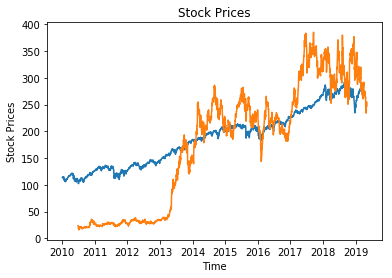

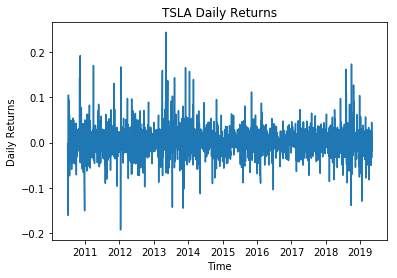

In [96]:
tsla=data_clean("TSLA")
tsla_returns=tsla.pct_change()


plt.plot(spy['Close'])
plt.plot(tsla['Close'])
plt.title('Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.show()

plt.plot(tsla_returns)
plt.title('TSLA Daily Returns')
plt.xlabel('Time')
plt.ylabel('Daily Returns')
plt.show()

In [97]:
spy=spy[spy.index>='2010-06-29']
tsla=tsla[tsla.index<='2019-04-08']

spy_returns=spy.pct_change()
tsla_returns=tsla.pct_change()

### Correlation between 2 stocks

Correlation between stocks
0.9432631536781562
Correlation between prices of two stocks will always be high. To find the correct correlation we need to find relation between stock returns
Correlation between stock returns
0.35866609839304164
The +ve correlation tells that both SPY and TSLA move in same direction, a correlation of 0.35 is not that high. A -ve correlation would have told us that 2 assets move in opposite direction


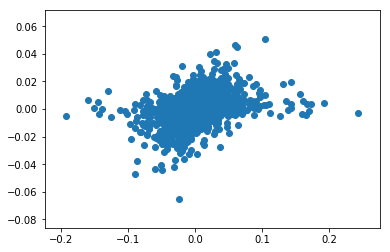

In [108]:

print("Correlation between stocks")
print(tsla['Close'].corr(spy['Close']))
print("Correlation between prices of two stocks will always be high. To find the correct correlation we need to find relation between stock returns")


print("Correlation between stock returns")
print(tsla_returns['Close'].corr(spy_returns['Close']))


print("The +ve correlation tells that both SPY and TSLA move in same direction, a correlation of 0.35 is not that high. A -ve correlation would have told us that 2 assets move in opposite direction")

plt.scatter(tsla_returns['Close'],spy_returns['Close'])

plt.show()

### Mean reversion strategy over different time intervals

The correlation between 2 prices(A & B) change from time to time. Lets say that on <br>
Day T the correlation is : 0.85 over a daily horizon <br>
On Day (T+2) Company A announces it's bad quartely results the price tanks and the correlation is now 0.34. A smart investor would know that Stock A is temporarily down. He would study such past intances when the correlation between 2 stocks deviated from it's normal and how quickly the Correlation recovered, thus he will buy A or can also sell B considering that the sector is performing bad thus hoping to see same correlation.<br>
The study needs to be done on different number of time horizon of 1 Day to an (365 days) an Year to have a full understanding of the behavior of assets

### Auto-Correlation of time series with itself with just 1 lag

An auto correlation of a stock price with itself will tell us about a stock nature. <br>
1) -ve Auto Correlation suggests a Mean Reversion behavior <br>
2) +ve Auto Correlation suggests a trending behavior of time series <br> 

Let's analyze TSLA behavior, I believe that it will be -ve auto correlation, let's check my belief on a time scale of 1 day to 1 Year

In [109]:
# Compute Daily Autcorrelation on daily levels

def autocorrelation_method(data,rules):
    # Compute the percentage change of prices
    temp = data.resample(rule=rules).last()
    returns = temp.pct_change()
    # Compute and print the autocorrelation of returns
    autocorrelation = returns['Close'].autocorr()
    return autocorrelation

print("Autocorrelation for TSLA for Daily, Weekly, Monthly and Yearly")
print("The autocorrelation of daily returns is %4.7f" %(autocorrelation_method(tsla,'B')))
print("The autocorrelation of weekly returns is %4.7f" %(autocorrelation_method(tsla,'W')))
print("The autocorrelation of monthly returns is %4.7f" %(autocorrelation_method(tsla,'M')))
print("The autocorrelation of annual returns is %4.7f" %(autocorrelation_method(tsla,'A')))

print("***********")

print("Autocorrelation for SPY for Daily, Weekly, Monthly and Yearly")
print("The autocorrelation of daily returns is %4.7f" %(autocorrelation_method(spy,'B')))
print("The autocorrelation of weekly returns is %4.7f" %(autocorrelation_method(spy,'W')))
print("The autocorrelation of monthly returns is %4.7f" %(autocorrelation_method(spy,'M')))
print("The autocorrelation of annual returns is %4.7f" %(autocorrelation_method(spy,'A')))

print("SPY shows a bit of mean reversion for all time periods, though it's not much strong")

Autocorrelation for TSLA for Daily, Weekly, Monthly and Yearly
The autocorrelation of daily returns is -0.0028575
The autocorrelation of weekly returns is 0.0162873
The autocorrelation of monthly returns is 0.1117104
The autocorrelation of annual returns is -0.0291968
***********
Autocorrelation for SPY for Daily, Weekly, Monthly and Yearly
The autocorrelation of daily returns is -0.0313929
The autocorrelation of weekly returns is -0.1102021
The autocorrelation of monthly returns is -0.1796418
The autocorrelation of annual returns is -0.2080017
SPY shows a bit of mean reversion for all time periods, though it's not much strong


### Any serious non zero auto correlation signifies that the series can be predicted from the past data.

### Plotting and analyzing Autocorrelation function with more than 1 lags

Let's say we have quarterly earnings for HRB company, we want to see if we can predict the earnigs using the ACF

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


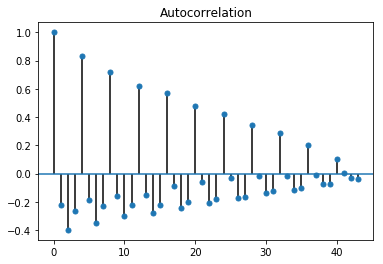

There is a high ACF on lags of 4,8,12,16,20.. earnings


In [110]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

HRB_data=pd.read_csv('data/HRB.csv')[['Earnings']]

acf_array=acf(HRB_data)
print(acf_array)

plot_acf(HRB_data,alpha=1)
plt.show()

print("There is a high ACF on lags of 4,8,12,16,20.. earnings")

### Lets look at auto corr for SPY with Lags and find confidence it's mean reversion confidence

The autocorrelation of weekly returns is -0.110
It tells it's a mean reverting behavior but how sure are we of this result. Is this statisitical significant?. In other words is there less than 5% chance that we will observer a negative autocorrelation if true autocorrelation was really 0. Are there any other autocorrelation at other lags that are significantly different from 0.
The approximate confidence interval is +/- 0.04


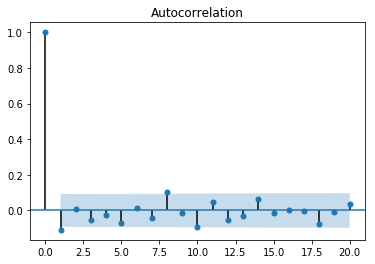

In [111]:
temp=spy.resample(rule='W').last()
returns=temp.pct_change()
res=returns['Close'].autocorr()
print("The autocorrelation of weekly returns is %4.3f" %res)

print("It tells it's a mean reverting behavior but how sure are we of this result. Is this statisitical significant?. In other words is there less than 5% chance that we will observer a negative autocorrelation if true autocorrelation was really 0. Are there any other autocorrelation at other lags that are significantly different from 0.")

nobs=len(spy)
conf=1.96/np.sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))


# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns['Close'].dropna(), alpha=0.05,lags=20)
plt.show()

### White Noise

AQR capital released a paper which discussed how effective is ML in financial markets and predictions. I have shared the link below. One of the most important line in it was about the ratio between the Signals and Noise is very low, because of which it becomes difficult to identify the right alpha source.

https://www.institutionalinvestor.com/article/b1fsn64kfq8b5h/AQR-s-Problem-With-Machine-Learning-Cats-Morph-Into-Dogs

Characterstics of White Noise :
1) Mean,Variance constant with time
2) 0 Autocorrelation for all lags

Special case of white noise 
1) Is white noise has normal distribution, it's Gaussian white noise.

A white noise time series is a sequence of uncorrelated identically distributed variables which have 0 auto-correlation and therefore we can't use past values to predict future data. Stock prices are also modelled as white noises and among that white noise we look for alpha.

Only the best of the best can find the alpha in a hay stack of white noise with methods like Magnet,Wind which for a quant is it's ability to think in a wild approach beyond limits and vigrous testing of many sources and methods


0.01939520150512469
0.04926697574277818


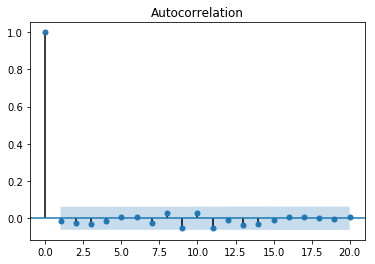

The autocorrelation is almost 0 for all the lags


In [114]:
returns=np.random.normal(loc=0.02,scale=0.05,size=1000)
print(np.mean(returns))
print(np.std(returns))

plot_acf(returns,alpha=0.05,lags=20)
plt.show()

print("The autocorrelation is almost 0 for all the lags")

### Random Walk 